Binomial option pricing model is a risk-neutral model used to value path-dependent options such as **American** options.

https://xplaind.com/552187/binomial-options-pricing-model

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [15]:
def binom_tree_call(N, T, S0, sigma, r, K):
    dt = T/N
    
    # factors you expect stock price to increase and decrease by
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u
    
    # probability of an up move
    p = (np.exp(r * dt) - d) / (u-d)
    
    # price tree
    price_tree = np.zeros([N+1, N+1])
    
    for i in range(N+1):
        for j in range(i+1):
            price_tree[j,i] = S0 * (d**j) * (u**(i-j))
            
    # option value t = N
    option = np.zeros([N+1, N+1])
    option[:, N] = np.maximum(np.zeros(N+1), price_tree[:, N]-K)
    
    # calculate option price at t=0
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option[j, i] = np.exp(-r*dt) * (p*option[j, i+1]+(1-p)*option[j+1, i+1])
            
#     print(price_tree)
    
    return option[0][0]

In [16]:
option_val = binom_tree_call(50, 1, 100, 0.1, 0.05, 100)
print(f'Option value = {option_val}')

Option value = 6.783564165691306


In [25]:
end = 250
call_vals = [binom_tree_call(num_steps, 1, 100, 0.1, 0.05, 100) for num_steps in range(2, end)]

Text(0.5, 1.0, 'Binomial Tree - Call Values')

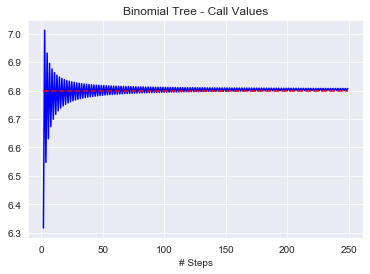

In [28]:
plt.plot(range(2,end), call_vals, color='b')
plt.plot(range(2,end), [6.8]*(end-2), color='r', linestyle='dashed')
plt.xlabel('# Steps')
plt.title('Binomial Tree - Call Values')